In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
sizes = df['koi_disposition'].value_counts(sort=1)
sizes

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [4]:
# Set features. This will also be used as your x values.
selected_features = df.drop(['koi_disposition'], axis=1)
print(selected_features.columns)

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


In [5]:
# Define X and y
y = df["koi_disposition"]
X = selected_features

In [6]:
# Split it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [9]:
# # # Pre-processing and Scale your data
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# # from tensorflow.keras.utils import to_categorical

# # X_scaler = MinMaxScaler().fit(X_train)
# # X_train_scaled = X_scaler.transform(X_train)
# # X_test_scaled = X_scaler.transform(X_test)

# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)
# encoded_y_train = label_encoder.transform(y_train)
# encoded_y_test = label_encoder.transform(y_test)

# # Step 2: Convert encoded labels to one-hot-encoding
# y_train_categorical = to_categorical(encoded_y_train)
# y_test_categorical = to_categorical(encoded_y_test)

# print(encoded_y_train)

In [11]:
# Test on KNN model with Train/Test split
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)

In [12]:
from sklearn import metrics
print("Training accuracy KNN (% of predictions that were correct) is:", metrics.accuracy_score(y_test, y_predicted))

Training accuracy KNN (% of predictions that were correct) is: 0.6097212294496068


In [15]:
# Searching the optimal k value for KNN model

knn_range = range(1,31)
knn_scores = []
for k in knn_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_predicted = knn.predict(X_test)
    knn_scores.append(metrics.accuracy_score(y_test, y_predicted))
    
print(knn_scores)

[0.6097212294496068, 0.5625446747676912, 0.6233023588277341, 0.6118656182987848, 0.631879914224446, 0.6275911365260901, 0.6411722659042173, 0.629735525375268, 0.6368834882058614, 0.6411722659042173, 0.6490350250178699, 0.6461758398856325, 0.6440314510364546, 0.6433166547533953, 0.634024303073624, 0.6375982844889206, 0.6433166547533953, 0.631879914224446, 0.634024303073624, 0.6311651179413867, 0.6311651179413867, 0.636168691922802, 0.6390278770550393, 0.634024303073624, 0.6354538956397426, 0.6325947105075054, 0.6325947105075054, 0.6311651179413867, 0.6304503216583274, 0.6268763402430307]


Text(0, 0.5, 'Accuracy score')

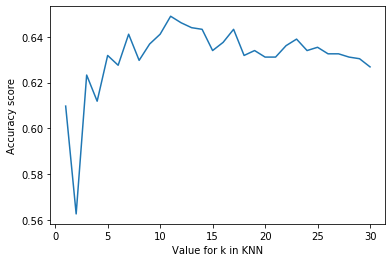

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(knn_range, knn_scores)
plt.xlabel("Value for k in KNN")
plt.ylabel("Accuracy score")